# Inflation Forecasting Challenge: Guidance for Participants


This notebook is designed for the **RAMP challenge** on forecasting inflation using macroeconomic indicators from the **FRED dataset**. 

## **Objectives**
- Load and explore macroeconomic data.
- Perform **time-series visualization**.
- Train a **random forest regressor** for inflation prediction.
- Evaluate model performance using **RMSE, MAE**.

---

## **Understanding the Challenge**
### **Why is Inflation Forecasting Important?**

Inflation is a crucial economic variable that affects a wide range of sectors, from **monetary policy** to **consumer behavior**. Accurate inflation forecasting is fundamental for a variety of reasons, as it helps stakeholders across different industries make well-informed decisions. 

#### **1. Policymakers (for instance Central Banks)**
Central banks, such as the Federal Reserve in the United States or the European Central Bank in the EU, rely heavily on accurate inflation forecasts to guide their monetary policy. 
- **Monetary Policy Adjustment**: Central banks adjust interest rates based on inflation trends to ensure economic stability. If inflation is too high, central banks may raise interest rates to cool down the economy, whereas lower inflation could prompt a reduction in rates to stimulate growth.
- **Inflation Targeting**: Many central banks have an inflation target (for instance 2% for the European Central Bank) that guides their decision-making process. Inflation forecasts help determine whether policies need to be adjusted to stay within this target range.
- **Long-Term Economic Stability**: Accurate forecasting is key for central banks to make decisions that promote long-term economic stability, prevent runaway inflation, and avoid deflationary spirals.

#### **2. Investors**
For investors, inflation forecasting is a critical factor in determining the expected returns on investments and managing risk.
- **Asset Allocation**: Inflation influences the relative attractiveness of various asset classes. For example, equities, bonds, and commodities all respond differently to inflation trends. Investors may shift their portfolios based on predicted inflation to minimize risk and maximize returns.
- **Risk Management**: High inflation can erode the purchasing power of future cash flows, making certain investments less valuable. Conversely, investors might seek inflation-protected securities (like TIPS in the U.S.) to hedge against inflationary risk.
- **Market Volatility**: Forecasts of rising or falling inflation can cause significant market volatility, as investors adjust their expectations for future returns. A well-timed inflation forecast can help investors navigate these fluctuations.

#### **3. Businesses**
Businesses need to understand inflation trends to make strategic decisions about pricing, cost management, and future growth.
- **Pricing Strategies**: Companies often adjust their prices in response to inflation. Accurate inflation forecasts allow businesses to plan price changes in advance, ensuring they maintain profitability while remaining competitive in the market.
- **Cost Planning**: Inflation affects the cost of raw materials, labor, and other inputs. If inflation is expected to rise, businesses can anticipate higher costs and adjust their budgeting and procurement strategies accordingly.
- **Wages and Labor**: Companies also need to consider how inflation impacts wage expectations. If inflation is high, employees may demand higher wages to keep up with the rising cost of living. Businesses that fail to forecast inflation accurately may struggle to attract and retain talent.
- **Long-Term Investment Decisions**: Inflation forecasts are essential for businesses when considering long-term investments in capital goods, new products, or expansion. High inflation may prompt businesses to delay investments, while stable or low inflation could encourage growth and expansion.

#### **4. Consumers**
Consumers are directly impacted by inflation, as it affects their daily expenses and long-term financial decisions.
- **Purchasing Power**: Inflation reduces the purchasing power of money, meaning consumers can buy less with the same amount of income. An accurate inflation forecast allows consumers to plan for price increases, adjust their spending habits, and manage their savings more effectively.
- **Saving and Investment Decisions**: With inflation affecting the real return on savings, consumers may seek alternative investment opportunities to outpace inflation, such as stocks or real estate. Understanding inflation forecasts helps them make more informed decisions about where to allocate their financial resources.
- **Consumer Confidence**: Inflation forecasting also impacts consumer confidence. When inflation is predictable and stable, consumers are more likely to make significant purchases, while erratic or rising inflation can make consumers hesitant to spend.


### **Key Challenges in This Dataset**
1. **Small Dataset**: The number of data points is relatively small compared to the number of variables.
2. **High Dimensionality**: Many macroeconomic indicators may be **irrelevant** or highly correlated.
3. **Time Dependence**: Inflation follows economic cycles, so **manual lagged features** are crucial.
4. **Feature Selection is Key**: Not all variables contribute to inflation; participants must identify the most **informative predictors**.



#### **What are the macroeconomic Variables Impacting Inflation ?**
Macroeconomic variables play a crucial role in understanding and forecasting inflation. According to economic research, several factors are particularly influential:

- **Demand-Pull Inflation**: As outlined in the **Phillips Curve** (Phillips, 1958), inflation can arise when aggregate demand outpaces aggregate supply, leading to higher prices. This model highlights how changes in consumer spending, government expenditure, and investment can drive inflation.
  
- **Cost-Push Inflation**: **Rising production costs**, such as increases in wages or raw material prices (e.g., oil), are another important factor contributing to inflation. The **cost-push model** suggests that when businesses face higher input costs, they pass these increases onto consumers through higher prices, leading to inflation.

- **Monetary Policy**: The relationship between money supply and inflation is critical, as discussed in **Milton Friedman's work** (Friedman, 1963). According to the quantity theory of money, an increase in the money supply without a corresponding increase in goods and services typically results in inflation. Central banks, therefore, monitor money supply growth when making policy decisions.

- **Expectations of Future Inflation**: The **expectations-augmented Phillips Curve** (Phelps, 1967) shows that inflation expectations influence actual inflation. If consumers and businesses expect higher inflation in the future, they adjust their behaviors—such as demanding higher wages or raising prices—which can become self-fulfilling.

- **Global Factors**: In an increasingly interconnected world, **import prices** and **exchange rates** also significantly impact inflation. Research by **Obstfeld and Rogoff** (1995) emphasized the importance of international factors in domestic inflation rates, highlighting how exchange rate movements and global commodity prices can transmit inflation across borders.

These macroeconomic variables provide a framework for understanding how inflation behaves and that is why we will use some of these to predict the inflation rate. 


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from problem import get_train_data
from estimator import get_estimator
from sklearn.preprocessing import MinMaxScaler
    

In [9]:

# Load training data
X_df, y = get_train_data()

# Display first few rows
print("Training Data Sample:")
display(X_df.head())

# Check dataset statistics
print("Dataset Statistics:")
display(X_df.describe())


Training Data Sample:


,CPILFESL,UNRATE,GDPC1,FEDFUNDS,DGS1,DGS10,M2SL,DCOILWTICO,CSUSHPINSA,RSXFS,...,BUSINV,EXUSUK,EXUSEU,SP500,VIXCLS,GS10,PPIACO,HOUST,CPIAUCSL,T10YIE
DATE,,,,,,,,,,,,,,,,,,,,,
2015-02-28,240.172,5.5,18666.621,0.11,0.224211,1.975263,11880.4,50.584211,166.623,384779.0,...,1795461.0,1.5329,1.1350,2110.848000,15.904211,1.98,191.1,886.0,235.342,1.715263
2015-03-31,240.755,5.4,18666.621,0.11,0.253636,2.042727,11892.9,47.823636,168.082,390738.0,...,1798476.0,1.4958,1.0819,2079.990455,14.812727,2.04,191.5,960.0,235.976,1.761818
2015-04-30,241.346,5.4,18782.243,0.12,0.233636,1.935000,11932.5,54.452857,169.964,391246.0,...,1804475.0,1.4968,1.0822,2094.862857,13.494762,1.94,190.9,1190.0,236.222,1.858182
2015-05-31,241.688,5.6,18782.243,0.12,0.241000,2.197500,11963.8,59.265000,171.846,394260.0,...,1809028.0,1.5456,1.1167,2111.943500,13.338500,2.20,193.4,1079.0,237.001,1.865500
2015-06-30,242.064,5.3,18782.243,0.13,0.275455,2.363636,12011.1,59.819545,173.447,394652.0,...,1820330.0,1.5576,1.1226,2099.283636,14.339545,2.36,194.8,1205.0,237.657,1.865909


Dataset Statistics:


,CPILFESL,UNRATE,GDPC1,FEDFUNDS,DGS1,DGS10,M2SL,DCOILWTICO,CSUSHPINSA,RSXFS,...,BUSINV,EXUSUK,EXUSEU,SP500,VIXCLS,GS10,PPIACO,HOUST,CPIAUCSL,T10YIE
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,252.773627,4.393220,19709.982051,1.120678,1.323183,2.279273,13524.050847,53.024137,191.685136,421350.966102,...,1.907990e+06,1.354473,1.128953,2459.462465,15.095326,2.278983,194.266102,1207.406780,245.962983,1.791862
std,7.425738,0.603685,708.626045,0.819667,0.823819,0.430582,979.857664,9.349994,13.900293,21672.718170,...,8.379224e+04,0.102090,0.042360,356.830728,3.682245,0.430167,6.574811,101.401068,7.000279,0.216503
min,240.172000,3.500000,18666.621000,0.110000,0.224211,1.504000,11880.400000,30.323000,166.623000,384779.000000,...,1.795461e+06,1.216000,1.054500,1904.418500,10.125455,1.500000,181.300000,886.000000,235.342000,1.307500
25%,246.844000,3.800000,19062.709000,0.375000,0.561988,1.955132,12739.800000,46.671454,179.414500,398790.500000,...,1.832266e+06,1.286650,1.105050,2105.065818,12.535228,1.960000,188.650000,1152.500000,239.274500,1.602857
50%,251.985000,4.300000,19660.766000,1.150000,1.223500,2.263158,13628.900000,51.970476,193.498000,416613.000000,...,1.885696e+06,1.314000,1.122800,2454.102500,14.339545,2.260000,193.900000,1205.000000,244.243000,1.820909
75%,258.642500,4.900000,20290.514000,1.870000,2.028929,2.551667,14243.150000,58.708214,204.810000,439344.000000,...,1.982840e+06,1.426950,1.150900,2770.164497,16.755682,2.550000,199.300000,1271.500000,252.371500,1.936190
max,266.020000,5.600000,20985.448000,2.420000,2.698500,3.152273,15334.300000,70.981429,212.226000,457253.000000,...,2.046856e+06,1.557800,1.234000,3176.749524,24.953158,3.150000,204.600000,1548.000000,258.630000,2.141818


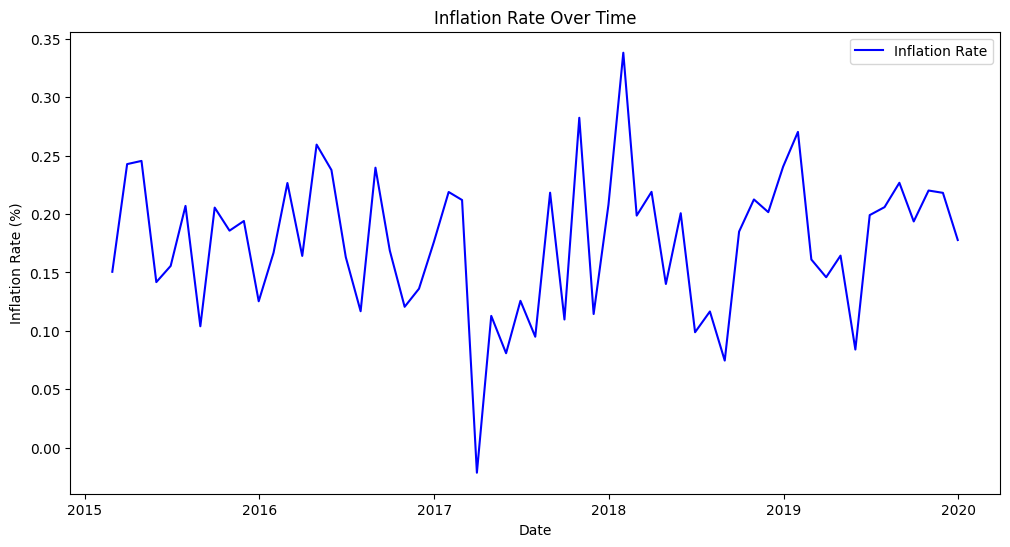

In [10]:

# Time-Series Plot of Inflation Rate
plt.figure(figsize=(12, 6))
plt.plot(X_df.index, y, label='Inflation Rate', color='blue')
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.title("Inflation Rate Over Time")
plt.legend()
plt.show()
    

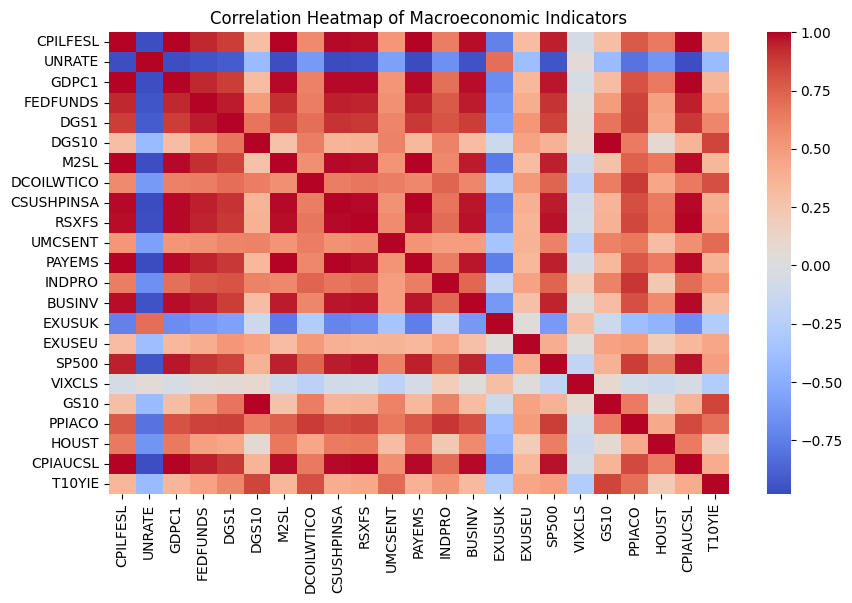

In [24]:

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(X_df.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Macroeconomic Indicators")
plt.show()
    

Let's now look closer at how some of our features are linked to the inflation rate

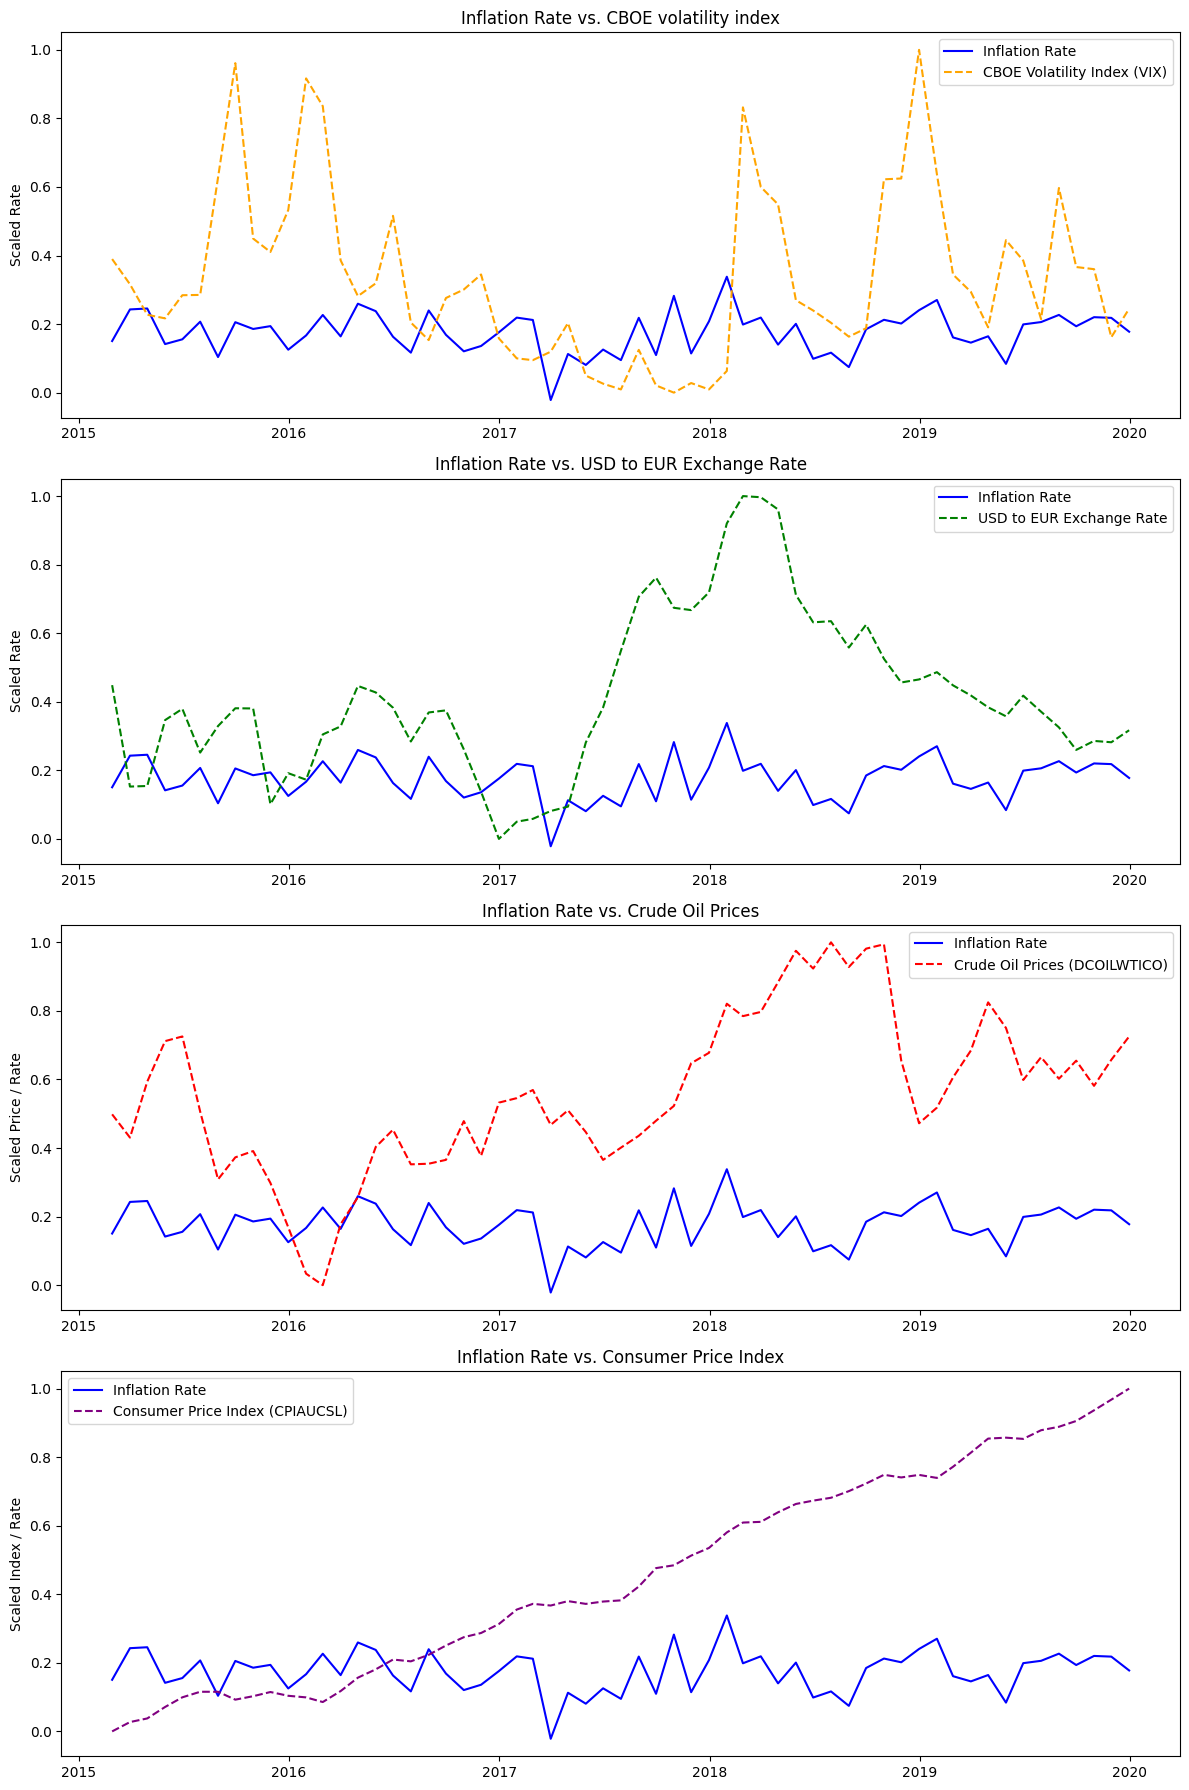

In [23]:
y_series = pd.Series(y, index=X_df.index, name='Inflation_Rate')
data_to_scale = pd.concat([X_df, y_series.rename('Inflation_Rate')], axis=1)

# Rescale the data for better visualization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, index=data_to_scale.index, columns=data_to_scale.columns)

# Plotting the comparisons
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))

# Inflation Rate vs. Unemployment Rate
axes[0].plot(X_df.index, y, label='Inflation Rate', color='blue')
axes[0].plot(X_df.index, scaled_df['VIXCLS'], label='CBOE Volatility Index (VIX)', color='orange', linestyle='dashed')
axes[0].set_title('Inflation Rate vs. CBOE volatility index')
axes[0].set_ylabel('Scaled Rate')
axes[0].legend()

# Inflation Rate vs. Federal Funds Rate
axes[1].plot(X_df.index, y, label='Inflation Rate', color='blue')
axes[1].plot(X_df.index, scaled_df['EXUSEU'], label='USD to EUR Exchange Rate', color='green', linestyle='dashed')
axes[1].set_title('Inflation Rate vs. USD to EUR Exchange Rate')
axes[1].set_ylabel('Scaled Rate')
axes[1].legend()

# Inflation Rate vs. Crude Oil Prices
axes[2].plot(X_df.index, y, label='Inflation Rate', color='blue')
axes[2].plot(X_df.index, scaled_df['DCOILWTICO'], label='Crude Oil Prices (DCOILWTICO)', color='red', linestyle='dashed')
axes[2].set_title('Inflation Rate vs. Crude Oil Prices')
axes[2].set_ylabel('Scaled Price / Rate')
axes[2].legend()

# Inflation Rate vs. Consumer Price Index
axes[3].plot(X_df.index, y, label='Inflation Rate', color='blue')
axes[3].plot(X_df.index, scaled_df['CPIAUCSL'], label='Consumer Price Index (CPIAUCSL)', color='purple', linestyle='dashed')
axes[3].set_title('Inflation Rate vs. Consumer Price Index')
axes[3].set_ylabel('Scaled Index / Rate')
axes[3].legend()

plt.tight_layout()
plt.show()

In [25]:

# Train a baseline model
print("training Random forest regressor model")
model = get_estimator()
model.fit(X_df, y)

# Make Predictions
y_pred = model.predict(X_df)
    

training Random forest regressor model


MAE: 0.0197, RMSE: 0.0242


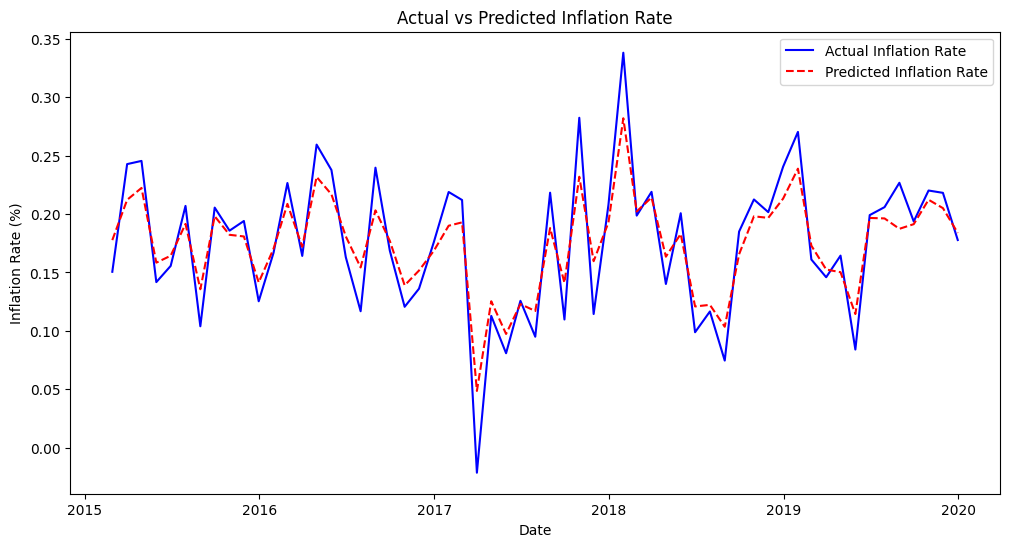

In [23]:

# Evaluate model performance
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(X_df.index, y, label='Actual Inflation Rate', color='blue')
plt.plot(X_df.index, y_pred, label='Predicted Inflation Rate', color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.title("Actual vs Predicted Inflation Rate")
plt.legend()
plt.show()
    

We see that the macroeconomic variables allow us to efficiently predict the inflation rate!